# Using GeoJson to plot Vietnam map

Data source: [GADM database](https://gadm.org/download_country.html#google_vignette)

This is a tutorial on how to use GeoJson files to plot Vietnam specific map plot.

## 1. Setting things up

There are a few things we have to set up before plotting our maps.

### 1.1 Importing necessary libraries

In [101]:
import geopandas as gpd

import geoplot
import geoplot.crs as gcrs

import random

### 1.2 Load our GeoJSON files

There are 3 files that all depicts Vietnam maps but in increasing complexity level.
- Level 1: Provinces/administrative city level.
- Level 2: Districs level.
- Level 3: Village level.

In [102]:
data_lv1 = gpd.read_file('../original_geo_data/gadm41_VNM_1.json')
data_lv2 = gpd.read_file('../original_geo_data/gadm41_VNM_2.json')
data_lv3 = gpd.read_file('../original_geo_data/gadm41_VNM_3.json')

### 1.3 Other ultilities

We will need to do some cleaning with the dataset as well. One of the task is to convert Vietnamese name to English, which essentially means removing all the diacritics used.

Code: [J2TEAM on Github](https://gist.github.com/J2TEAM/9992744f15187ba51d46aecab21fd469)

In [103]:
s1 = u'ÀÁÂÃÈÉÊÌÍÒÓÔÕÙÚÝàáâãèéêìíòóôõùúýĂăĐđĨĩŨũƠơƯưẠạẢảẤấẦầẨẩẪẫẬậẮắẰằẲẳẴẵẶặẸẹẺẻẼẽẾếỀềỂểỄễỆệỈỉỊịỌọỎỏỐốỒồỔổỖỗỘộỚớỜờỞởỠỡỢợỤụỦủỨứỪừỬửỮữỰựỲỳỴỵỶỷỸỹ'
s0 = u'AAAAEEEIIOOOOUUYaaaaeeeiioooouuyAaDdIiUuOoUuAaAaAaAaAaAaAaAaAaAaAaAaEeEeEeEeEeEeEeEeIiIiOoOoOoOoOoOoOoOoOoOoOoOoUuUuUuUuUuUuUuYyYyYyYy'
def remove_accents(input_str):
	s = ''
	for c in input_str:
		if c in s1:
			s += s0[s1.index(c)]
		else:
			s += c
	return s

## 2. Preprocess data

After checking the data, you might notice that there are a lot of fields that we won't need to use to plot a graph. I've already truncated the data and store them in geo_data directory.

The structure for each level will be:
- Level 1: 
    - `province`: name of the province
    - `type`: name of administrative division level 1
    - `geometry`: geometry data 

- Level 2:
    - `province`: name of the province
    - `district`: name of the district
    - `type2`: type of administrative division level 2
    - `geometry`: geometry data 

- Level 3:
    - `province`: name of the province
    - `district`: name of the district
    - `ward`: name of the ward
    - `type3`: type of administrative division level 3
    - `geometry`: geometry data 

In [121]:
# Let's plot the maps with the data we have processed.
data_lv1 = gpd.read_file('geo_data/gadm41_VNM_1.json')
data_lv2 = gpd.read_file('geo_data/gadm41_VNM_2.json')
data_lv3 = gpd.read_file('geo_data/gadm41_VNM_3.json')

## 3. Plotting the maps

### 3.1 Ploting at country level

With level 1 complexity:

<GeoAxes: >

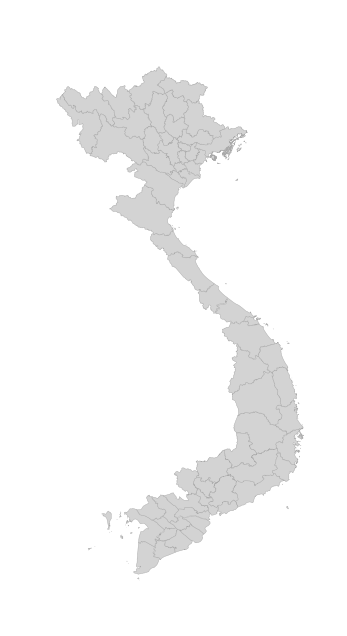

In [122]:
# Using gepplot.polyplot produce map with quite low resolution
geoplot.polyplot(data_lv1, projection=gcrs.AlbersEqualArea(), edgecolor='darkgrey', facecolor='lightgrey', linewidth=.3,
    figsize=(12, 8))

With level 2 complexity: 

<GeoAxes: >

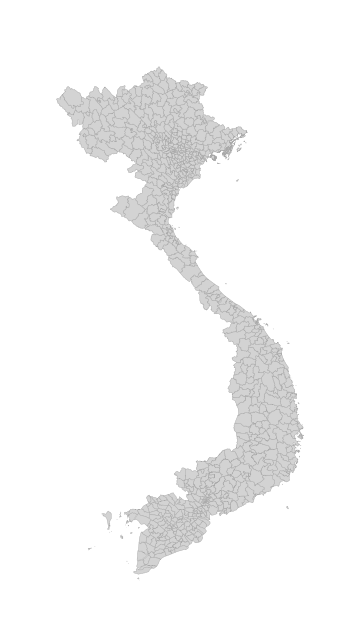

In [123]:
# Using gepplot.polyplot produce map with quite low resolution
geoplot.polyplot(data_lv2, projection=gcrs.AlbersEqualArea(), edgecolor='darkgrey', facecolor='lightgrey', linewidth=.3,
    figsize=(12, 8))

With level 3 complexity:

<GeoAxes: >

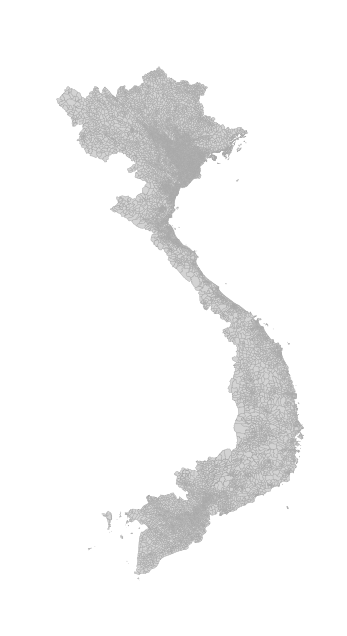

In [124]:
# Using gepplot.polyplot produce map with quite low resolution
geoplot.polyplot(data_lv3, projection=gcrs.AlbersEqualArea(), edgecolor='darkgrey', facecolor='lightgrey', linewidth=.3,
    figsize=(12, 8))

### 3.2 Ploting at provincial level

Let's choose a province to plot

In [125]:
province = 'TienGiang'

Using level 1 complexity:

<GeoAxes: >

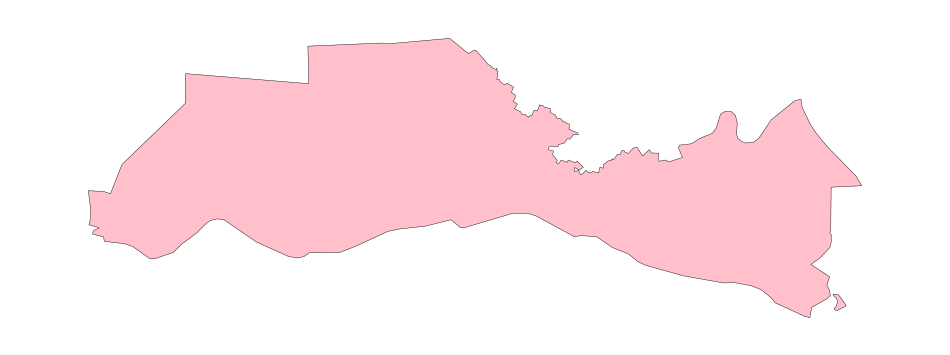

In [126]:
geoplot.polyplot(data_lv1[data_lv1['province'] == province], projection=gcrs.AlbersEqualArea(), edgecolor='black', facecolor='pink', linewidth=.3,
    figsize=(12, 8))

<GeoAxes: >

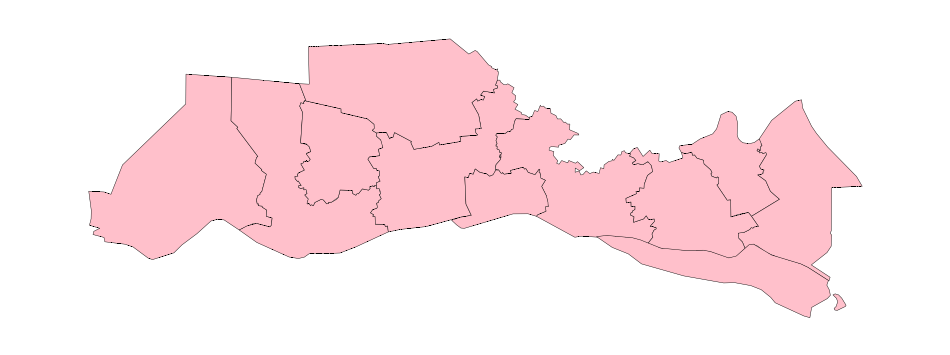

In [127]:
geoplot.polyplot(data_lv2[data_lv2['province'] == province], projection=gcrs.AlbersEqualArea(), edgecolor='black', facecolor='pink', linewidth=.3,
    figsize=(12, 8))

<GeoAxes: >

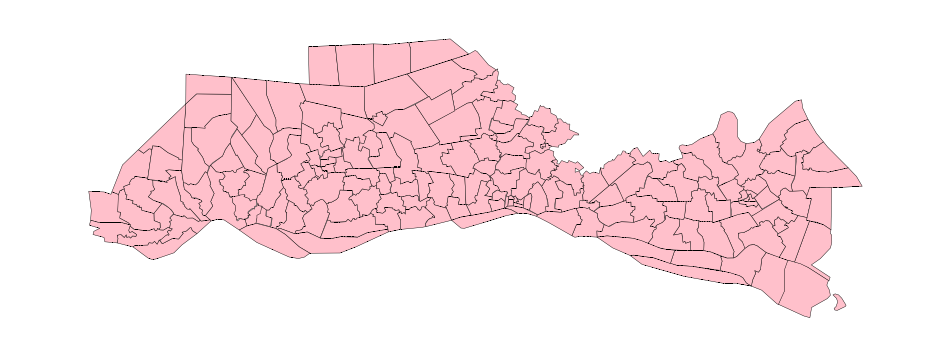

In [128]:
geoplot.polyplot(data_lv3[data_lv3['province'] == province], projection=gcrs.AlbersEqualArea(), edgecolor='black', facecolor='pink', linewidth=.3,
    figsize=(12, 8))

### 3.3 Plotting at district level

We can only plot with district level with data comlexity of level 2 and 3.

In [129]:
# district  = 'your choice'
# Generate random district
district = random.choice(data_lv2[data_lv2['province'] == province]['district'].unique())

With level 2:

<GeoAxes: >

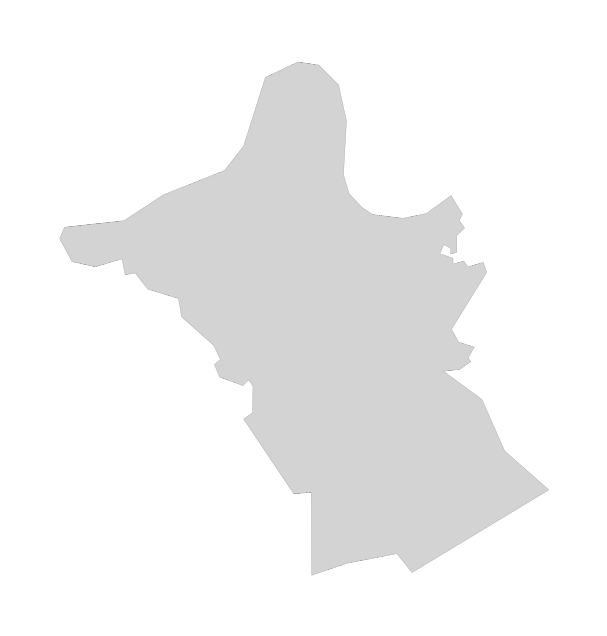

In [130]:
geoplot.polyplot(data_lv2[(data_lv2['province'] == province) & (data_lv2['district'] == district)], projection=gcrs.AlbersEqualArea(), edgecolor='darkgrey', facecolor='lightgrey', linewidth=.3,
    figsize=(12, 8))

With level 3:

<GeoAxes: >

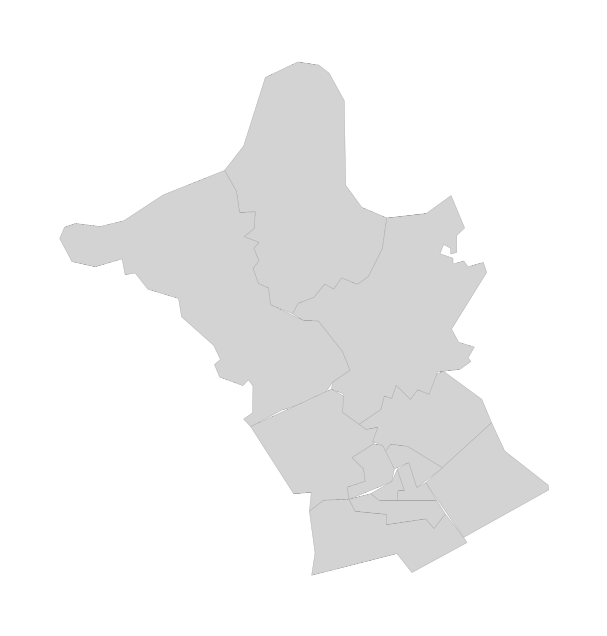

In [131]:
geoplot.polyplot(data_lv3[(data_lv3['province'] == province) & (data_lv3['district'] == district)], projection=gcrs.AlbersEqualArea(), edgecolor='darkgrey', facecolor='lightgrey', linewidth=.3,
    figsize=(12, 8))

### 3.4 Plotting at ward/village level

We can only plot this with complexity of level 3.

In [132]:
# ward  = 'your choice'
# Generate random ward
ward = random.choice(data_lv3[(data_lv3['province'] == province) & (data_lv3['district'] == district)]['ward'].unique())

<GeoAxes: >

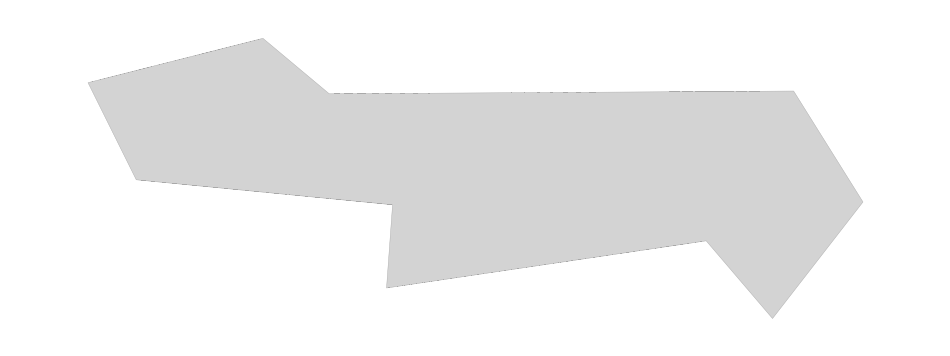

In [133]:
geoplot.polyplot(data_lv3[(data_lv3['province'] == province) & (data_lv3['district'] == district) & (data_lv3['ward'] == ward)], projection=gcrs.AlbersEqualArea(), edgecolor='darkgrey', facecolor='lightgrey', linewidth=.3,
    figsize=(12, 8))